In [1]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

cwd = os.getcwd()
DATA_PATH = cwd + '/../data/matches/Premier League'

In [2]:
df1 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2005-2006.csv'))
df2 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2006-2007.csv'))
df3 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2007-2008.csv'))
df4 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2008-2009.csv'))
df5 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2009-2010.csv'))
df6 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2010-2011.csv'))
df7 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2011-2012.csv'))
df8 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2012-2013.csv'))
df9 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2013-2014.csv'))
df10 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2014-2015.csv'))
df11 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2015-2016.csv'))
df12 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2016-2017.csv'))
df13 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2017-2018.csv'))
df14 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2018-2019.csv'))
df15 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2019-2020.csv'))
df16 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2020-2021.csv'))
df17 = pd.read_csv(os.path.join(DATA_PATH, 'Season 2021-2022.csv'))

In [3]:
df12.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50


In [4]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%y')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%y')
df3['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%y')
df4['Date'] = pd.to_datetime(df4['Date'], format='%d/%m/%y')
df5['Date'] = pd.to_datetime(df5['Date'], format='%d/%m/%y')
df6['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%y')
df7['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%y')
df8['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%y')
df9['Date'] = pd.to_datetime(df4['Date'], format='%d/%m/%y')
df10['Date'] = pd.to_datetime(df5['Date'], format='%d/%m/%y')
df11['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%y')
df12['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%y')
df13['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%Y')
df14['Date'] = pd.to_datetime(df4['Date'], format='%d/%m/%Y')
df15['Date'] = pd.to_datetime(df5['Date'], format='%d/%m/%Y')
df16['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df17['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')

In [5]:
# Get only the columns we need to get stats
cols = ['Date', 'HomeTeam', 'AwayTeam', 'HS', 'AS', 
        'FTHG','FTAG', 'FTR', 'B365H', 'B365D', 'B365A']

playing_stats1 = df1[cols]
playing_stats2 = df2[cols]
playing_stats3 = df3[cols]
playing_stats4 = df4[cols]
playing_stats5 = df5[cols]
playing_stats6 = df6[cols]
playing_stats7 = df7[cols]
playing_stats8 = df8[cols]
playing_stats9 = df9[cols]
playing_stats10 = df10[cols]
playing_stats11 = df11[cols]
playing_stats12 = df12[cols]
playing_stats13 = df13[cols]
playing_stats14 = df14[cols]
playing_stats15 = df15[cols]
playing_stats16 = df16[cols]
playing_stats17 = df17[cols]

In [6]:
def get_matchweek(playing_stats):
    """
    Adding matchweek feature to dataset
    """
    j = 1
    MatchWeek = []
    for i in range(len(playing_stats)):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j += 1
    playing_stats = playing_stats.assign(MW=MatchWeek)
    return playing_stats

playing_stats1 = get_matchweek(playing_stats1)
playing_stats2 = get_matchweek(playing_stats2)
playing_stats3 = get_matchweek(playing_stats3)
playing_stats4 = get_matchweek(playing_stats4)
playing_stats5 = get_matchweek(playing_stats5)
playing_stats6 = get_matchweek(playing_stats6)
playing_stats7 = get_matchweek(playing_stats7)
playing_stats8 = get_matchweek(playing_stats8)
playing_stats9 = get_matchweek(playing_stats9)
playing_stats10 = get_matchweek(playing_stats10)
playing_stats11 = get_matchweek(playing_stats11)
playing_stats12 = get_matchweek(playing_stats12)
playing_stats13 = get_matchweek(playing_stats13)
playing_stats14 = get_matchweek(playing_stats14)
playing_stats15 = get_matchweek(playing_stats15)
playing_stats16 = get_matchweek(playing_stats16)
playing_stats17 = get_matchweek(playing_stats17)

In [7]:
# Gets the goals scored agg arranged by teams and matchweek
def get_goals_scored(playing_stats):
    # Get the number of matchweeks in the season
    mw = max(playing_stats['MW'])
    
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stats.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # Build dict where value is a list of goals scored per match
    for i in range(len(playing_stats)):
        HTGS = playing_stats.iloc[i]['FTHG']
        ATGS = playing_stats.iloc[i]['FTAG']
        teams[playing_stats.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stats.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1, mw+1)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2, mw+1):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored

In [8]:
# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stats):
    # Get the number of matchweeks in the season
    mw = max(playing_stats['MW'])

    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stats.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stats)):
        ATGC = playing_stats.iloc[i]['FTHG']
        HTGC = playing_stats.iloc[i]['FTAG']
        teams[playing_stats.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stats.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1, mw+1)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2, mw+1):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

In [9]:
get_goals_conceded(playing_stats10)

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,0
Arsenal,1,3,4,6,6,7,9,11,11,11,...,31,32,32,32,33,34,35,35,36,0
Aston Villa,0,0,1,1,4,7,9,12,14,16,...,39,42,45,45,48,50,50,56,57,0
Burnley,3,4,4,4,4,8,10,13,16,19,...,49,49,50,51,52,53,53,53,53,0
Chelsea,1,1,4,6,7,7,7,8,9,10,...,26,26,26,26,27,27,28,31,32,0
Crystal Palace,2,5,8,8,10,10,12,14,16,19,...,41,42,43,45,47,48,50,51,51,0
Everton,2,4,10,10,13,14,16,16,17,17,...,42,42,43,43,43,46,48,49,50,0
Hull,0,1,3,5,7,11,11,13,13,14,...,40,43,45,45,45,48,49,51,51,0
Leicester,2,4,5,5,8,10,12,13,15,16,...,49,51,51,51,54,54,54,54,55,0
Liverpool,1,4,4,5,8,9,10,12,12,13,...,32,36,36,36,37,38,39,42,48,0
Man City,0,1,2,4,5,7,7,8,10,10,...,28,30,34,34,36,36,36,38,38,0


In [10]:
def get_goal_stats(playing_stats):
    GC = get_goals_conceded(playing_stats)
    GS = get_goals_scored(playing_stats)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stats.iloc[i].HomeTeam
        at = playing_stats.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stats['HTGS'] = HTGS
    playing_stats['ATGS'] = ATGS
    playing_stats['HTGC'] = HTGC
    playing_stats['ATGC'] = ATGC
    
    return playing_stats

In [11]:
# Apply to each dataset
playing_stats1 = get_goal_stats(playing_stats1)
playing_stats2 = get_goal_stats(playing_stats2)
playing_stats3 = get_goal_stats(playing_stats3)
playing_stats4 = get_goal_stats(playing_stats4)
playing_stats5 = get_goal_stats(playing_stats5)
playing_stats6 = get_goal_stats(playing_stats6)
playing_stats7 = get_goal_stats(playing_stats7)
playing_stats8 = get_goal_stats(playing_stats8)
playing_stats9 = get_goal_stats(playing_stats9)
playing_stats10 = get_goal_stats(playing_stats10)
playing_stats11 = get_goal_stats(playing_stats11)
playing_stats12 = get_goal_stats(playing_stats12)
playing_stats13 = get_goal_stats(playing_stats13)
playing_stats14 = get_goal_stats(playing_stats14)
playing_stats15 = get_goal_stats(playing_stats15)
playing_stats16 = get_goal_stats(playing_stats16)
playing_stats17 = get_goal_stats(playing_stats17)

In [12]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

In [13]:
def get_cuml_points(matches):
    matches_points = matches.applymap(get_points)
    for i in range(2,39):
        matches_points[i] = matches_points[i] + matches_points[i-1]
        
    matches_points.insert(column=0, loc=0, value=[0*i for i in range(20)])
    return matches_points

In [14]:
def get_matches(playing_stats):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stats.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # The value corresponding to keys is a list containing the match result
    for i in range(len(playing_stats)):
        if playing_stats.iloc[i].FTR == 'H':
            teams[playing_stats.iloc[i].HomeTeam].append('W')
            teams[playing_stats.iloc[i].AwayTeam].append('L')
        elif playing_stats.iloc[i].FTR == 'A':
            teams[playing_stats.iloc[i].AwayTeam].append('W')
            teams[playing_stats.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stats.iloc[i].AwayTeam].append('D')
            teams[playing_stats.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

In [15]:

def get_agg_points(playing_stats):
    matches = get_matches(playing_stats)
    cum_pts = get_cuml_points(matches)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stats.iloc[i].HomeTeam
        at = playing_stats.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stats['HTP'] = HTP
    playing_stats['ATP'] = ATP
    return playing_stats

In [16]:
playing_stats1 = get_agg_points(playing_stats1)
playing_stats2 = get_agg_points(playing_stats2)
playing_stats3 = get_agg_points(playing_stats3)
playing_stats4 = get_agg_points(playing_stats4)
playing_stats5 = get_agg_points(playing_stats5)
playing_stats6 = get_agg_points(playing_stats6)
playing_stats7 = get_agg_points(playing_stats7)
playing_stats8 = get_agg_points(playing_stats8)
playing_stats9 = get_agg_points(playing_stats9)
playing_stats10 = get_agg_points(playing_stats10)
playing_stats11 = get_agg_points(playing_stats11)
playing_stats12 = get_agg_points(playing_stats12)
playing_stats13 = get_agg_points(playing_stats13)
playing_stats14 = get_agg_points(playing_stats14)
playing_stats15 = get_agg_points(playing_stats15)
playing_stats16 = get_agg_points(playing_stats16)
playing_stats17 = get_agg_points(playing_stats17)

In [17]:
def get_form(playing_stats, num):
    form = get_matches(playing_stats)
    form_final = form.copy()
    for i in range(num, 39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

In [18]:
def add_form(playing_stats, num):
    form = get_form(playing_stats, num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stats.iloc[i].HomeTeam
        at = playing_stats.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stats['HM' + str(num)] = h                 
    playing_stats['AM' + str(num)] = a

    
    return playing_stats

In [19]:
def add_form_df(playing_stats):
    playing_stats = add_form(playing_stats, 1)
    playing_stats = add_form(playing_stats, 2)
    playing_stats = add_form(playing_stats, 3)
    playing_stats = add_form(playing_stats, 4)
    playing_stats = add_form(playing_stats, 5)
    return playing_stats  

In [20]:
# Make changes to df
playing_stats1 = add_form_df(playing_stats1)
playing_stats2 = add_form_df(playing_stats2)
playing_stats3 = add_form_df(playing_stats3)
playing_stats4 = add_form_df(playing_stats4)
playing_stats5 = add_form_df(playing_stats5)
playing_stats6 = add_form_df(playing_stats6)
playing_stats7 = add_form_df(playing_stats7)
playing_stats8 = add_form_df(playing_stats8)
playing_stats9 = add_form_df(playing_stats9)
playing_stats10 = add_form_df(playing_stats10)
playing_stats11 = add_form_df(playing_stats11)
playing_stats12 = add_form_df(playing_stats12)
playing_stats13 = add_form_df(playing_stats13)
playing_stats14 = add_form_df(playing_stats14)
playing_stats15 = add_form_df(playing_stats15)
playing_stats16 = add_form_df(playing_stats16)
playing_stats17 = add_form_df(playing_stats17)


In [21]:
# Rearranging columns
cols = ['Date', 'MW', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_stats1 = playing_stats1[cols]
playing_stats2 = playing_stats2[cols]
playing_stats3 = playing_stats3[cols]
playing_stats4 = playing_stats4[cols]
playing_stats5 = playing_stats5[cols]
playing_stats6 = playing_stats6[cols]
playing_stats7 = playing_stats7[cols]
playing_stats8 = playing_stats8[cols]
playing_stats9 = playing_stats9[cols]
playing_stats10 = playing_stats10[cols]
playing_stats11 = playing_stats11[cols]
playing_stats12 = playing_stats12[cols]
playing_stats13 = playing_stats13[cols]
playing_stats14 = playing_stats14[cols]
playing_stats15 = playing_stats15[cols]
playing_stats16 = playing_stats16[cols]
playing_stats17 = playing_stats17[cols]

In [22]:
Standings = pd.read_csv(os.path.join(DATA_PATH, 'EPLStandings.csv'))
Standings.set_index(['Team'], inplace=True)
Standings = Standings.fillna(18)

In [23]:
Standings

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Team,,,,,,,,,,,,,,,,,,,,,
Arsenal,2.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,...,4.0,4.0,3.0,2.0,5.0,6.0,5.0,8.0,8.0,5.0
Aston Villa,6.0,8.0,8.0,16.0,6.0,10.0,16.0,11.0,6.0,6.0,...,15.0,15.0,17.0,20.0,18.0,18.0,18.0,17.0,11.0,14.0
Birmingham,18.0,18.0,18.0,13.0,10.0,12.0,18.0,18.0,19.0,18.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Blackburn,18.0,18.0,10.0,6.0,15.0,15.0,6.0,10.0,7.0,15.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Blackpool,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Bolton,18.0,18.0,16.0,17.0,8.0,6.0,8.0,7.0,16.0,13.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Bournemouth,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,16.0,9.0,12.0,14.0,18.0,18.0,18.0
Bradford,17.0,20.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Brentford,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0


In [24]:
def get_last(playing_stats, Standings, year):
    col_index = year - 2000 - 1
    HomeTeamLP = []
    AwayTeamLP = []
    for i in range(380):
        ht = playing_stats.iloc[i].HomeTeam
        at = playing_stats.iloc[i].AwayTeam
        HomeTeamLP.append(Standings.loc[ht][col_index])
        AwayTeamLP.append(Standings.loc[at][col_index])
    playing_stats['HomeTeamLP'] = HomeTeamLP
    playing_stats['AwayTeamLP'] = AwayTeamLP
    return playing_stats

In [25]:
playing_stats1 = get_last(playing_stats1, Standings, 2005)
playing_stats2 = get_last(playing_stats2, Standings, 2006)
playing_stats3 = get_last(playing_stats3, Standings, 2007)
playing_stats4 = get_last(playing_stats4, Standings, 2008)
playing_stats5 = get_last(playing_stats5, Standings, 2009)
playing_stats6 = get_last(playing_stats6, Standings, 2010)
playing_stats7 = get_last(playing_stats7, Standings, 2011)
playing_stats8 = get_last(playing_stats8, Standings, 2012)
playing_stats9 = get_last(playing_stats9, Standings, 2013)
playing_stats10 = get_last(playing_stats10, Standings, 2014)
playing_stats11 = get_last(playing_stats11, Standings, 2015)
playing_stats12 = get_last(playing_stats12, Standings, 2016)
playing_stats13 = get_last(playing_stats13, Standings, 2017)
playing_stats14 = get_last(playing_stats14, Standings, 2018)
playing_stats15 = get_last(playing_stats15, Standings, 2019)
playing_stats16 = get_last(playing_stats16, Standings, 2020)
playing_stats17 = get_last(playing_stats17, Standings, 2021)

In [26]:
playing_stats = pd.concat([playing_stats1,
                          playing_stats2,
                          playing_stats3,
                          playing_stats4,
                          playing_stats5,
                          playing_stats6,
                          playing_stats7,
                          playing_stats8,
                          playing_stats9,
                          playing_stats10,
                          playing_stats11,
                          playing_stats12,
                          playing_stats13,
                          playing_stats14,
                          playing_stats15,
                          playing_stats16,
                          playing_stats17], ignore_index=True)

In [27]:
playing_stats

,Date,MW,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP
0,2005-08-13,1,Aston Villa,Bolton,2,2,D,0,0,0,...,M,M,M,M,M,M,M,M,6.0,8.0
1,2005-08-13,1,Everton,Man United,0,2,A,0,0,0,...,M,M,M,M,M,M,M,M,17.0,3.0
2,2005-08-13,1,Fulham,Birmingham,0,0,D,0,0,0,...,M,M,M,M,M,M,M,M,9.0,10.0
3,2005-08-13,1,Man City,West Brom,0,0,D,0,0,0,...,M,M,M,M,M,M,M,M,16.0,18.0
4,2005-08-13,1,Middlesbrough,Liverpool,0,0,D,0,0,0,...,M,M,M,M,M,M,M,M,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,2007-05-13,38,Crystal Palace,Man United,1,0,H,49,57,46,...,W,W,D,L,W,D,L,L,14.0,3.0
6456,2007-05-13,38,Leicester,Southampton,4,1,H,58,42,58,...,W,L,L,L,L,L,D,L,5.0,11.0
6457,2007-05-13,38,Liverpool,Wolves,3,1,H,91,37,25,...,D,W,W,D,L,D,L,L,1.0,7.0
6458,2007-05-13,38,Man City,Aston Villa,3,2,H,96,50,24,...,W,W,W,D,D,L,W,W,2.0,17.0


In [28]:
playing_stats = playing_stats.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
playing_stats['MatchIndex'] = [i for i in range(len(playing_stats))]

In [29]:
def calculate_strength(df_historical_data):
    HomeLeagueAverage = df_historical_data['HomeGoals'].mean()
    AwayLeagueAverage = df_historical_data['AwayGoals'].mean()

    home = df_historical_data[['HomeTeam', 'HomeGoals', 'AwayGoals']].rename(
        columns={'HomeTeam':'Team', 'HomeGoals':'HomeScored', 'AwayGoals':'HomeConceded'}).groupby(
        ['Team'], as_index=False)[['HomeScored', 'HomeConceded']].mean()
    away = df_historical_data[['AwayTeam', 'HomeGoals', 'AwayGoals']].rename(
        columns={'AwayTeam':'Team', 'HomeGoals':'AwayConceded', 'AwayGoals':'AwayScored'}).groupby(
        ['Team'], as_index=False)[['AwayScored', 'AwayConceded']].mean()
        
    df_strength = pd.merge(home, away, on='Team')

    average_home_scored, average_home_conceded = home['HomeScored'].mean(), home['HomeConceded'].mean()
    average_away_scored, average_away_conceded = away['AwayScored'].mean(), away['AwayConceded'].mean()

    df_strength['HomeAttackPower'] = df_strength['HomeScored'] / average_home_scored
    df_strength['HomeDefensePower'] = df_strength['HomeConceded'] / average_home_conceded
    df_strength['AwayAttackPower'] = df_strength['AwayScored'] / average_away_scored
    df_strength['AwayDefensePower'] = df_strength['AwayConceded'] / average_away_conceded

    df_strength.set_index('Team', inplace=True)
    return df_strength, HomeLeagueAverage, AwayLeagueAverage

In [30]:
first_time = True
last_10_rounds_strength = None
HomeLeagueAverage = 1
AwayLeagueAverage = 1

EstimatedHomeGoals = [None for i in range(100)]
EstimatedAwayGoals = [None for i in range(100)]

for index, row in playing_stats.iterrows():
    if row['MW'] < 11 and first_time == True:
        pass
    else:
        if first_time == True:
            first_time = False
        if row['MW'] != int(playing_stats[playing_stats['MatchIndex'] == index-1]['MW']):
            first_week_match_index = index
            last_10_rounds_data = playing_stats.loc[(first_week_match_index - 100 <= playing_stats.MatchIndex) & (playing_stats.MatchIndex <= first_week_match_index - 1)]
            last_10_rounds_strength, HomeLeagueAverage, AwayLeagueAverage = calculate_strength(last_10_rounds_data)
        
        try:
            home_attack_power = last_10_rounds_strength.loc[row['HomeTeam'], 'HomeAttackPower']
        except:
            home_attack_power = 1

        try:
            home_defense_power = last_10_rounds_strength.loc[row['HomeTeam'], 'HomeDefensePower']
        except:
            home_defense_power = 1
        
        if home_defense_power < 0.05:
            home_defense_power = 0.1

        try:
            away_attack_power = last_10_rounds_strength.loc[row['AwayTeam'], 'AwayAttackPower']
        except:
            away_attack_power = 1

        try:
            away_defense_power = last_10_rounds_strength.loc[row['AwayTeam'], 'AwayAttackPower']
        except:
            away_defense_power = 1

        if away_defense_power < 0.05:
            away_defense_power = 0.1
            
        EstimatedHomeGoals.append(home_attack_power * away_defense_power * HomeLeagueAverage)
        EstimatedAwayGoals.append(away_attack_power * home_defense_power * AwayLeagueAverage)

playing_stats['EstimatedHomeGoals'] = EstimatedHomeGoals
playing_stats['EstimatedAwayGoals'] = EstimatedAwayGoals

In [31]:
playing_stats

,Date,MW,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTGS,ATGS,HTGC,...,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MatchIndex,EstimatedHomeGoals,EstimatedAwayGoals
0,2005-08-13,1,Aston Villa,Bolton,2,2,D,0,0,0,...,M,M,M,M,M,6.0,8.0,0,NaN,NaN
1,2005-08-13,1,Everton,Man United,0,2,A,0,0,0,...,M,M,M,M,M,17.0,3.0,1,NaN,NaN
2,2005-08-13,1,Fulham,Birmingham,0,0,D,0,0,0,...,M,M,M,M,M,9.0,10.0,2,NaN,NaN
3,2005-08-13,1,Man City,West Brom,0,0,D,0,0,0,...,M,M,M,M,M,16.0,18.0,3,NaN,NaN
4,2005-08-13,1,Middlesbrough,Liverpool,0,0,D,0,0,0,...,M,M,M,M,M,11.0,4.0,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,2007-05-13,38,Crystal Palace,Man United,1,0,H,49,57,46,...,L,W,D,L,L,14.0,3.0,6455,0.189496,0.025005
6456,2007-05-13,38,Leicester,Southampton,4,1,H,58,42,58,...,L,L,L,D,L,5.0,11.0,6456,0.909580,0.470674
6457,2007-05-13,38,Liverpool,Wolves,3,1,H,91,37,25,...,D,L,D,L,L,1.0,7.0,6457,1.279097,0.147086
6458,2007-05-13,38,Man City,Aston Villa,3,2,H,96,50,24,...,D,D,L,W,W,2.0,17.0,6458,4.547900,0.941349


In [32]:
# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

In [33]:
playing_stats['HTFormPtsStr'] = playing_stats['HM1'] + playing_stats['HM2'] + playing_stats['HM3'] + playing_stats['HM4'] + playing_stats['HM5']
playing_stats['ATFormPtsStr'] = playing_stats['AM1'] + playing_stats['AM2'] + playing_stats['AM3'] + playing_stats['AM4'] + playing_stats['AM5']

playing_stats['HTFormPts'] = playing_stats['HTFormPtsStr'].apply(get_form_points)
playing_stats['ATFormPts'] = playing_stats['ATFormPtsStr'].apply(get_form_points)

In [34]:
# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stats['HTWinStreak3'] = playing_stats['HTFormPtsStr'].apply(get_3game_ws)
playing_stats['HTWinStreak5'] = playing_stats['HTFormPtsStr'].apply(get_5game_ws)
playing_stats['HTLossStreak3'] = playing_stats['HTFormPtsStr'].apply(get_3game_ls)
playing_stats['HTLossStreak5'] = playing_stats['HTFormPtsStr'].apply(get_5game_ls)

playing_stats['ATWinStreak3'] = playing_stats['ATFormPtsStr'].apply(get_3game_ws)
playing_stats['ATWinStreak5'] = playing_stats['ATFormPtsStr'].apply(get_5game_ws)
playing_stats['ATLossStreak3'] = playing_stats['ATFormPtsStr'].apply(get_3game_ls)
playing_stats['ATLossStreak5'] = playing_stats['ATFormPtsStr'].apply(get_5game_ls)

In [35]:
# Get Goal Difference
playing_stats['HTGD'] = playing_stats['HTGS'] - playing_stats['HTGC']
playing_stats['ATGD'] = playing_stats['ATGS'] - playing_stats['ATGC']

# Diff in points
playing_stats['DiffPts'] = playing_stats['HTP'] - playing_stats['ATP']
playing_stats['DiffFormPts'] = playing_stats['HTFormPts'] - playing_stats['ATFormPts']

# Diff in last year positions
playing_stats['DiffLP'] = playing_stats['HomeTeamLP'] - playing_stats['AwayTeamLP']

In [36]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stats.MW = playing_stats.MW.astype(float)

for col in cols:
    playing_stats[col] = playing_stats[col] / playing_stats.MW

In [37]:
playing_stats

,Date,MW,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,2005-08-13,1.0,Aston Villa,Bolton,2,2,D,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2.0
1,2005-08-13,1.0,Everton,Man United,0,2,A,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,14.0
2,2005-08-13,1.0,Fulham,Birmingham,0,0,D,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-1.0
3,2005-08-13,1.0,Man City,West Brom,0,0,D,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2.0
4,2005-08-13,1.0,Middlesbrough,Liverpool,0,0,D,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,2007-05-13,38.0,Crystal Palace,Man United,1,0,H,49,57,46,...,0,0,0,0,0,0.078947,0.026316,-0.342105,0.105263,11.0
6456,2007-05-13,38.0,Leicester,Southampton,4,1,H,58,42,58,...,0,0,0,0,0,0.000000,-0.552632,0.236842,0.157895,-6.0
6457,2007-05-13,38.0,Liverpool,Wolves,3,1,H,91,37,25,...,0,0,0,0,0,1.736842,-0.078947,1.000000,0.289474,-6.0
6458,2007-05-13,38.0,Man City,Aston Villa,3,2,H,96,50,24,...,0,0,0,0,0,1.894737,-0.026316,1.184211,0.131579,-15.0


In [38]:
playing_stats = playing_stats.drop(["Date","HomeTeam","AwayTeam","HomeTeamLP","AwayTeamLP","HTFormPts","ATFormPts",
                                "HomeGoals","AwayGoals","HTFormPtsStr","ATFormPtsStr", "MatchIndex"], axis=1)

In [39]:
playing_stats.HTGS = playing_stats.HTGS/playing_stats.HTGS.max()
playing_stats.ATGS = playing_stats.ATGS/playing_stats.ATGS.max()
playing_stats.HTGC = playing_stats.HTGC/playing_stats.HTGC.max()
playing_stats.ATGC = playing_stats.ATGC/playing_stats.ATGC.max()

In [40]:
playing_stats

,MW,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,1.0,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2.0
1,1.0,A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,14.0
2,1.0,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-1.0
3,1.0,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2.0
4,1.0,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,38.0,H,0.480392,0.542857,0.541176,0.682927,1.184211,1.526316,L,D,...,0,0,0,0,0,0.078947,0.026316,-0.342105,0.105263,11.0
6456,38.0,H,0.568627,0.400000,0.682353,0.768293,1.289474,1.052632,D,W,...,0,0,0,0,0,0.000000,-0.552632,0.236842,0.157895,-6.0
6457,38.0,H,0.892157,0.352381,0.294118,0.487805,2.342105,1.342105,W,W,...,0,0,0,0,0,1.736842,-0.078947,1.000000,0.289474,-6.0
6458,38.0,H,0.941176,0.476190,0.282353,0.621951,2.368421,1.184211,D,W,...,0,0,0,0,0,1.894737,-0.026316,1.184211,0.131579,-15.0


In [41]:
playing_stats = playing_stats.drop(["MW"], axis=1)

In [42]:
playing_stats.shape

(6460, 32)

In [43]:
6460 - 380

6080

In [44]:
from sklearn.preprocessing import LabelEncoder

ftrLE = LabelEncoder()

dataset = playing_stats[100:]
dataset.FTR = ftrLE.fit_transform(dataset.FTR)
dataset.to_csv("./../data/final/dataset.csv", index=None)

In [45]:
# Testing set (2021-22 season)
test = playing_stats[6080:]
test

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
6080,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,10.0
6081,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-15.0
6082,A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-5.0
6083,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-10.0
6084,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,H,0.480392,0.542857,0.541176,0.682927,1.184211,1.526316,L,D,W,...,0,0,0,0,0,0.078947,0.026316,-0.342105,0.105263,11.0
6456,H,0.568627,0.400000,0.682353,0.768293,1.289474,1.052632,D,W,W,...,0,0,0,0,0,0.000000,-0.552632,0.236842,0.157895,-6.0
6457,H,0.892157,0.352381,0.294118,0.487805,2.342105,1.342105,W,W,D,...,0,0,0,0,0,1.736842,-0.078947,1.000000,0.289474,-6.0
6458,H,0.941176,0.476190,0.282353,0.621951,2.368421,1.184211,D,W,W,...,0,0,0,0,0,1.894737,-0.026316,1.184211,0.131579,-15.0


In [46]:
# Train dataset (season 2005/2006 until 2020/2021)
train = playing_stats[100:6080]
train.tail(10)

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
6070,H,0.519608,0.380952,0.458824,0.536585,1.526316,1.078947,W,W,W,...,0,0,0,0,0,0.368421,-0.105263,0.447368,0.131579,-12.0
6071,H,0.519608,0.542857,0.529412,0.414634,1.368421,1.763158,W,L,D,...,0,1,0,0,0,0.210526,0.605263,-0.394737,-0.131579,15.0
6072,A,0.264706,0.419048,0.600000,0.756098,0.736842,1.105263,D,L,L,...,0,0,0,0,0,-0.631579,-0.473684,-0.368421,-0.131579,6.0
6073,H,0.578431,0.323810,0.623529,0.890244,1.473684,0.684211,W,W,W,...,0,0,0,0,0,0.157895,-1.026316,0.789474,0.210526,0.0
6074,A,0.647059,0.609524,0.541176,0.524390,1.736842,1.552632,L,W,L,...,0,0,0,0,0,0.526316,0.552632,0.184211,-0.052632,5.0
6075,H,0.647059,0.390476,0.494118,0.780488,1.736842,1.157895,W,W,W,...,0,0,0,0,0,0.631579,-0.605263,0.578947,0.184211,-10.0
6076,H,0.764706,0.447619,0.376471,0.524390,2.184211,1.552632,L,W,L,...,0,0,0,0,0,1.210526,0.105263,0.631579,0.052632,-7.0
6077,H,0.186275,0.314286,0.741176,0.658537,0.526316,1.026316,L,W,L,...,0,0,0,0,0,-1.157895,-0.552632,-0.500000,0.000000,3.0
6078,H,0.578431,0.447619,0.552941,0.792683,1.631579,1.131579,W,D,L,...,0,0,0,0,0,0.315789,-0.473684,0.500000,0.000000,-6.0
6079,A,0.343137,0.676190,0.588235,0.524390,1.184211,1.868421,L,L,W,...,0,0,0,0,0,-0.394737,0.736842,-0.684211,-0.026316,1.0


In [47]:
print(train.shape)
print(test.shape)

(5980, 32)
(380, 32)


### Label Encoding Preprocessing

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [49]:
ftrLE = LabelEncoder()
train.FTR = ftrLE.fit_transform(train.FTR)
test.FTR = ftrLE.transform(test.FTR)
train.head(10)

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
100,2,0.107843,0.142857,0.164706,0.134146,1.090909,1.636364,L,D,W,...,0,0,0,0,0,-0.272727,0.363636,-0.545455,-0.181818,8.0
101,0,0.088235,0.066667,0.200000,0.146341,0.454545,0.636364,L,L,D,...,0,0,0,0,0,-0.727273,-0.454545,-0.181818,0.181818,5.0
102,1,0.117647,0.123810,0.070588,0.085366,1.727273,1.545455,D,W,W,...,0,0,0,0,0,0.545455,0.545455,0.181818,0.272727,14.0
103,2,0.107843,0.095238,0.058824,0.170732,2.000000,0.818182,W,W,W,...,0,0,0,1,0,0.545455,-0.363636,1.181818,1.000000,9.0
104,0,0.088235,0.076190,0.211765,0.121951,0.727273,1.090909,L,W,L,...,0,0,0,0,0,-0.818182,-0.181818,-0.363636,-0.545455,13.0
105,2,0.107843,0.085714,0.094118,0.195122,1.545455,0.818182,L,W,W,...,0,0,0,0,0,0.272727,-0.636364,0.727273,0.181818,10.0
106,2,0.127451,0.085714,0.082353,0.207317,1.545455,0.454545,D,W,L,...,0,0,0,0,0,0.545455,-0.727273,1.090909,0.272727,-17.0
107,0,0.088235,0.085714,0.188235,0.097561,0.818182,1.454545,L,W,L,...,0,0,0,0,0,-0.636364,0.090909,-0.636364,-0.454545,2.0
108,2,0.088235,0.142857,0.117647,0.121951,1.272727,1.727273,W,L,W,...,0,0,0,0,0,-0.090909,0.454545,-0.454545,0.181818,8.0
109,2,0.098039,0.104762,0.164706,0.097561,0.818182,1.545455,W,D,L,...,0,0,0,0,0,-0.363636,0.272727,-0.727273,-0.181818,-7.0


In [50]:
le_name_mapping = dict(zip(ftrLE.classes_, ftrLE.transform(ftrLE.classes_)))
print(le_name_mapping)

{'A': 0, 'D': 1, 'H': 2}


In [50]:
hmLE = LabelEncoder()
train.HM1 = hmLE.fit_transform(train.HM1)
test.HM1 = hmLE.transform(test.HM1)
test.head()

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
6080,2,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,...,0,0,0,0,0,0.0,0.0,0.0,0.0,10.0
6081,2,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-15.0
6082,0,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-5.0
6083,2,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-10.0
6084,2,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0


In [51]:
train.HM2 = hmLE.fit_transform(train.HM2)
train.HM3 = hmLE.fit_transform(train.HM3)
train.HM4 = hmLE.fit_transform(train.HM4)
train.HM5 = hmLE.fit_transform(train.HM5)
train.AM1 = hmLE.fit_transform(train.AM1)
train.AM2 = hmLE.fit_transform(train.AM2)
train.AM3 = hmLE.fit_transform(train.AM3)
train.AM4 = hmLE.fit_transform(train.AM4)
train.AM5 = hmLE.fit_transform(train.AM5)

test.HM2 = hmLE.fit_transform(test.HM2)
test.HM3 = hmLE.fit_transform(test.HM3)
test.HM4 = hmLE.fit_transform(test.HM4)
test.HM5 = hmLE.fit_transform(test.HM5)
test.AM1 = hmLE.fit_transform(test.AM1)
test.AM2 = hmLE.fit_transform(test.AM2)
test.AM3 = hmLE.fit_transform(test.AM3)
test.AM4 = hmLE.fit_transform(test.AM4)
test.AM5 = hmLE.fit_transform(test.AM5)

In [52]:
test.head()

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
6080,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,10.0
6081,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-15.0
6082,0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-5.0
6083,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-10.0
6084,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0


In [53]:
onehotencoder = OneHotEncoder()
onehotencoder.fit(train.FTR.values.reshape(-1,1))

finalTrain = onehotencoder.transform([[each] for each in train.FTR]).toarray()
finalTest = onehotencoder.transform([[each] for each in test.FTR]).toarray()

In [54]:
print(finalTrain.shape)
print(finalTest.shape)

(5980, 3)
(380, 3)


In [55]:
train.to_csv("./../data/final/epl_data_train_onehot.csv",index=None)
test.to_csv("./../data/final/epl_data_test_onehot.csv",index=None)

### Feature Importance

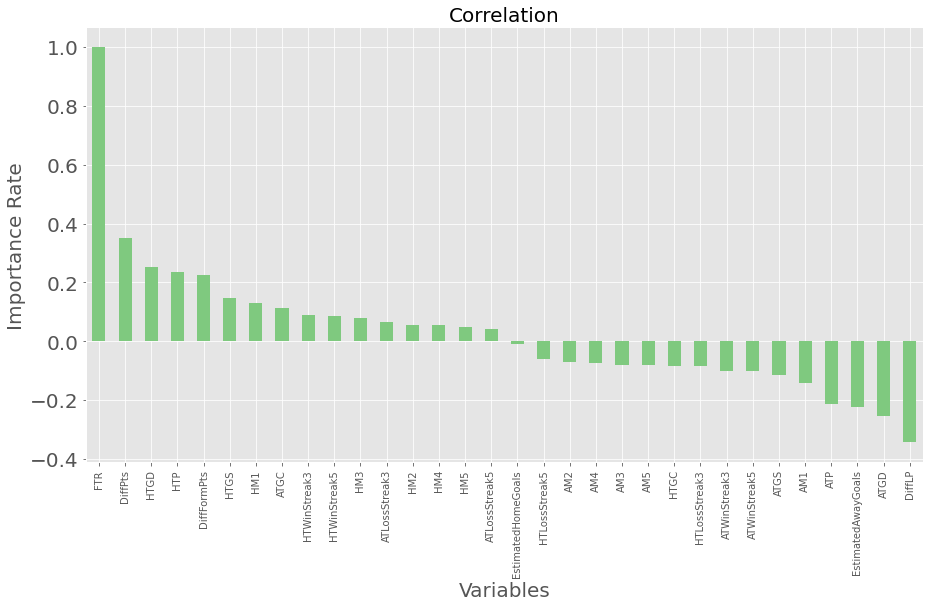

Most Positive Correlations:
FTR            1.000000
DiffPts        0.351489
HTGD           0.251493
HTP            0.233883
DiffFormPts    0.224943
Name: FTR, dtype: float64
Most Negative Correlations:
AM1                  -0.141534
ATP                  -0.215041
EstimatedAwayGoals   -0.223059
ATGD                 -0.255893
DiffLP               -0.344404
Name: FTR, dtype: float64


In [56]:
# Visualization

import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(15,8))
plt.style.use('ggplot')
my_cmap = cm.get_cmap('Accent')

correlations = train.corr()['FTR'].sort_values(ascending=False)
correlations.plot(kind='bar', cmap=my_cmap)

plt.title('Correlation',fontsize=20)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Importance Rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Most Positive Correlations:')
print(correlations.head(5))
print('Most Negative Correlations:')
print(correlations.tail(5))

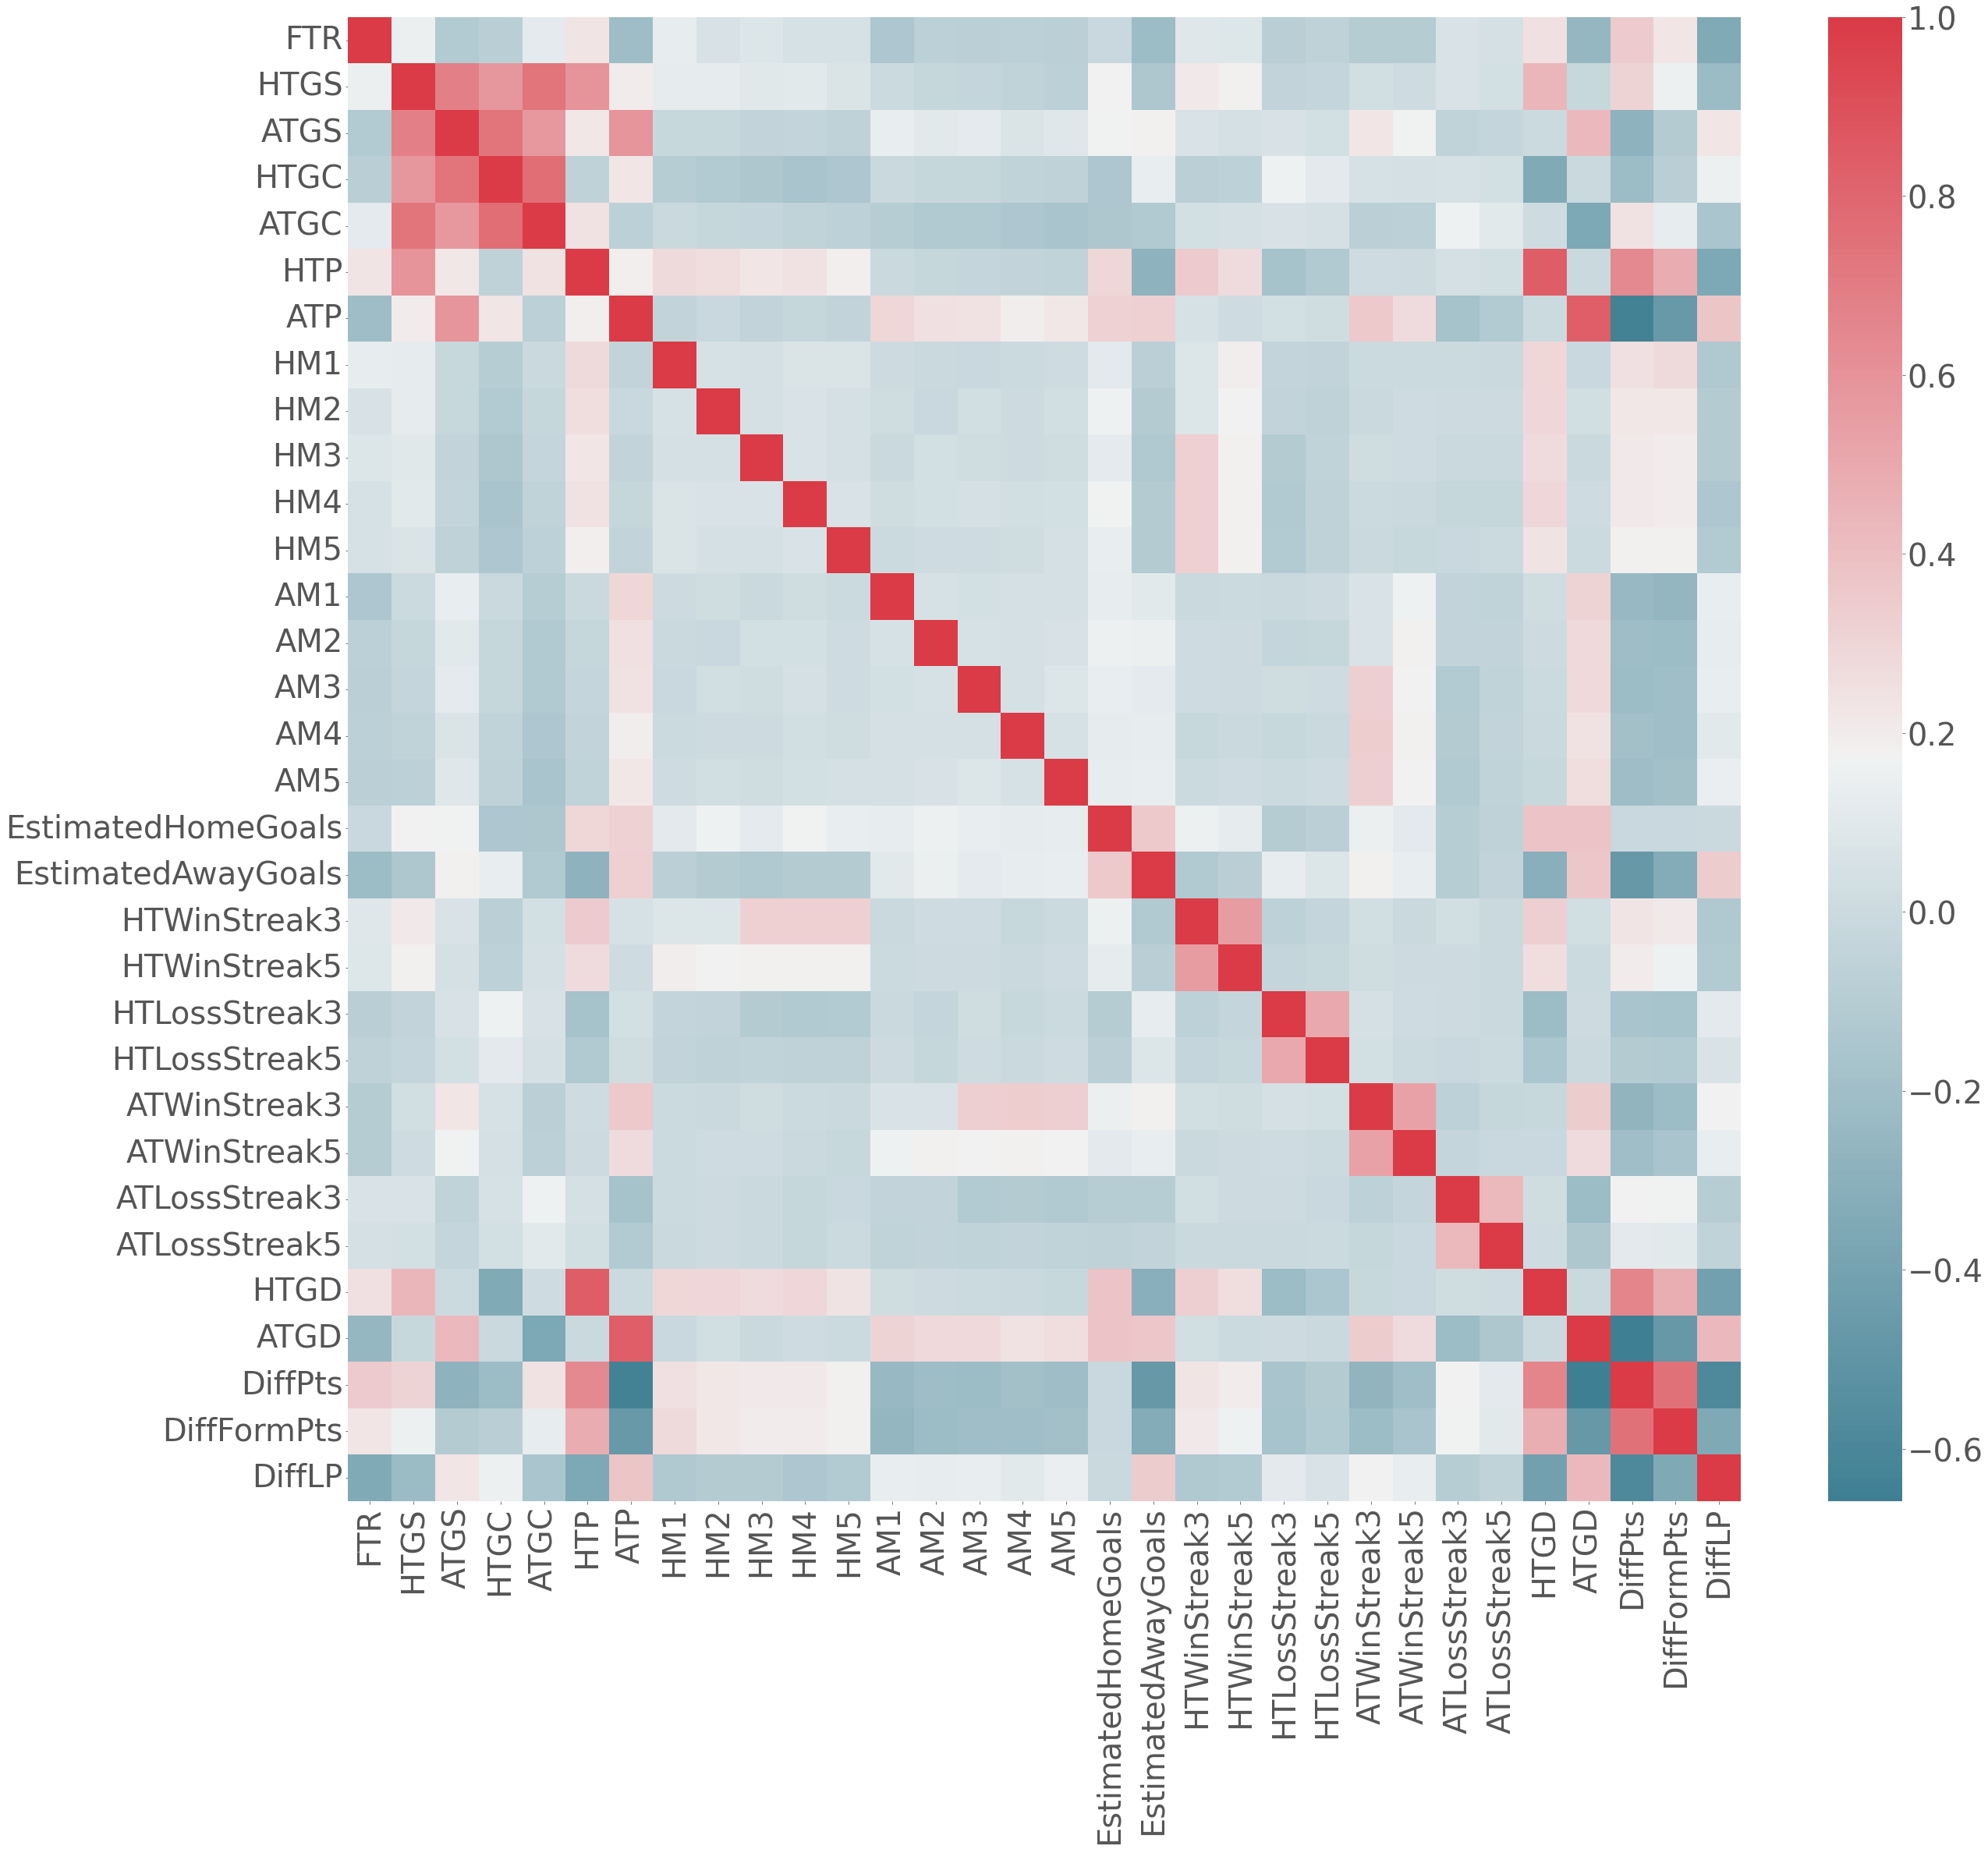

In [57]:
import seaborn as sns

cor = train.corr()
plt.figure(figsize=(40,35))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor, annot=False, cmap=cmap)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 40,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 40,rotation=360)
ax.figure.axes[-1].tick_params(labelsize=40)
plt.show()